## Data visualisation Drosophila melanogaster - larvas' behavioral tests
- mef - control line
- mefvxCG4190 - RNAi line
#### Data was generated randomly using normal distribution.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import scipy.stats as stats
import numpy as np
import seaborn as sns
import glob

In [7]:
def load_csv(file_path):
    return pd.read_csv(file_path, index_col=None, sep=",")

csv = load_csv("data/behavioral-tests-mef.csv")


In [8]:
means = csv[["line", "peristaltic movements per 30 seconds", "righting time"]]
mef_color="crimson"
mef_cg_color = "steelblue"

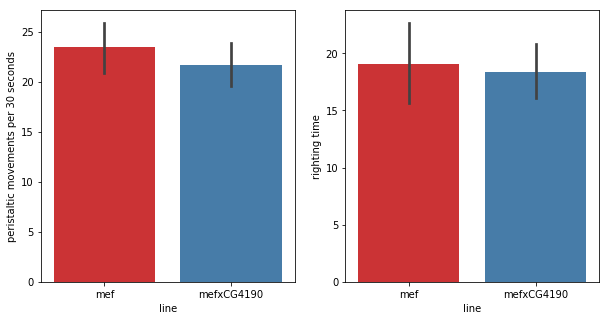

In [9]:
exp = ["peristaltic movements per 30 seconds", "righting time"]
palette="Set1"
def plots(kind):
    
    fig = plt.figure(figsize=(10,5))
    
    axes = fig.subplots(1, 2).flatten()
    for i, y in enumerate(exp):
        p = sns.catplot(data=means, x="line", y=y, kind=kind, ax=axes[i], palette=palette)
        plt.close(p.fig)
        
plots("bar")
# plt.savefig("behavioral_tests_box-mef")

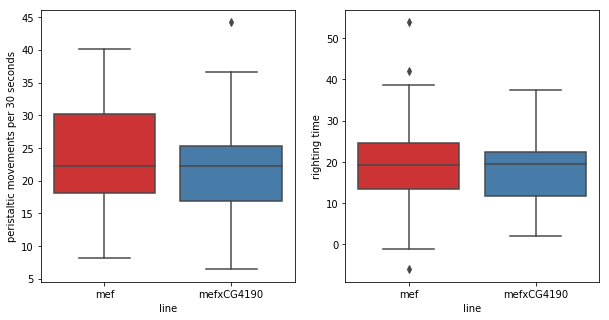

In [10]:
plots("box")
# plt.savefig("behavioral_tests_plot-mef")

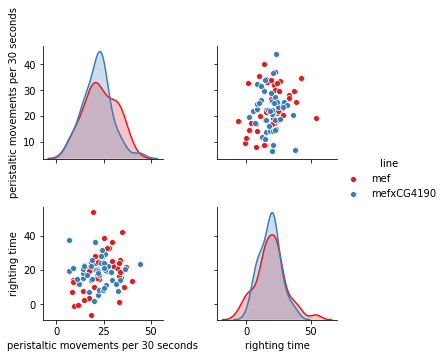

In [11]:
sns.pairplot(means, hue="line", palette=palette)
# plt.savefig("behavioral_tests_comparison-mef")

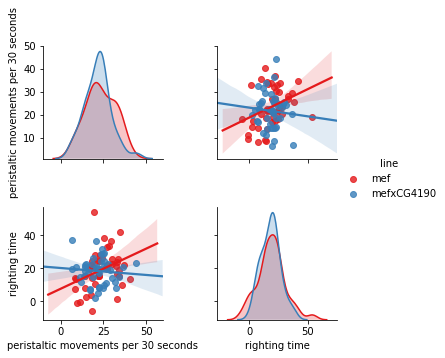

In [12]:
sns.pairplot(means, hue="line", palette=palette, kind="reg")
# plt.savefig("behavioral_tests_comparison-mef")

# przdziały ufności dla predykcji

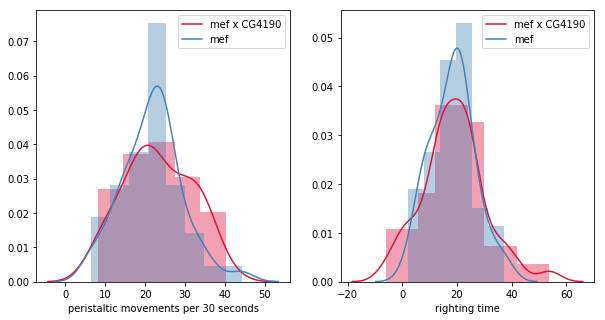

In [13]:
def hists():
    fig = plt.figure(figsize=(10,5))
    axes = fig.subplots(1, 2).flatten()
    for i, y in enumerate(exp):
        bins=10
        p = sns.distplot(means.loc[0:45, y],
            ax=axes[i],
            kde=True,
            #bins=bins,
            color=mef_color,
            kde_kws={"label": "mef x CG4190"});
        
        x = sns.distplot(means.loc[45:, y],
            ax=axes[i],
            kde=True,
            color=mef_cg_color,
           # bins=bins,
            kde_kws={"label": "mef"});
        

hists()
# plt.savefig("behavioral_tests_hists_mef")

In [22]:
exp = ["peristaltic movements per 30 seconds", "righting time"]

for i in exp:
    print(str(i))
    print(ttest_ind(means.loc[0:45, i],
          means.loc[45:, i])[1])

peristaltic movements per 30 seconds
0.37148208304593777
righting time
0.7971894589945946
